In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../results/cliff_results_a129_27-07-2023_11:36:31.csv').rename(columns=lambda x: x.strip())

In [33]:
results = df.groupby(['iters', 'train_size', 'test_size'], as_index=False).agg({'pval':['mean','std'], 'time':['mean', 'std']})
results.columns = ['iters', 'train_size', 'test_size',
                   'pval_mean', 'pval_std', 'time_mean', 'time_std']

# Varying Iterations

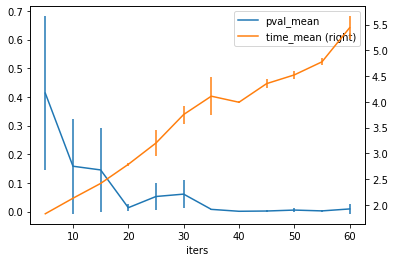

In [40]:
fig, ax = plt.subplots()
iters_df = results[(results['train_size'] == 256) & (results['test_size'] == 512)]
iters_df.plot(ax=ax, x='iters', y='pval_mean', yerr='pval_std')
iters_df.plot(ax=ax, x='iters', y='time_mean', yerr='time_std', secondary_y=True);

# Varying Train Data

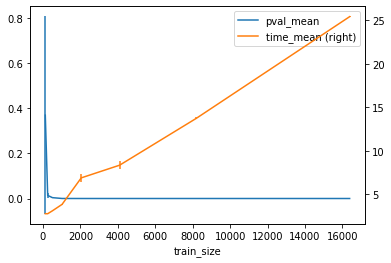

In [37]:
fig, ax = plt.subplots()
iters_df = results[(results['iters'] == 20) & (results['test_size'] == 512)]
iters_df.plot(ax=ax, x='train_size', y='pval_mean', yerr='pval_std')
iters_df.plot(ax=ax, x='train_size', y='time_mean', yerr='time_std', secondary_y=True);

# Varying Test Data

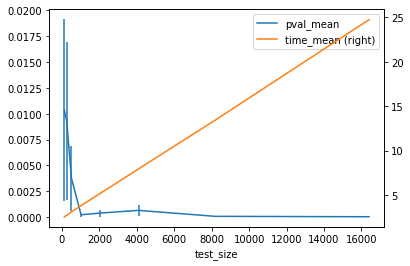

In [38]:
fig, ax = plt.subplots()
iters_df = results[(results['iters'] == 20) & (results['train_size'] == 512)]
iters_df.plot(ax=ax, x='test_size', y='pval_mean', yerr='pval_std')
iters_df.plot(ax=ax, x='test_size', y='time_mean', yerr='time_std', secondary_y=True);

# Sorting by Pval and Time

In [41]:
# Top-20 p-values
results.sort_values('pval_mean').head(20)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
767,60,16384,16384,1.879709e-194,0.000000e+00,139.735581,0.577029
766,60,16384,8192,5.959023e-186,0.000000e+00,105.695233,0.562816
765,60,16384,4096,1.563855e-176,0.000000e+00,88.640815,0.424273
703,55,16384,16384,1.276047e-173,0.000000e+00,128.490270,0.899301
702,55,16384,8192,2.020935e-160,3.500404e-160,96.790959,0.361931
701,55,16384,4096,1.348027e-159,1.121249e-159,80.893498,0.266822
638,50,16384,8192,2.489046e-156,4.309349e-156,88.220903,0.573968
639,50,16384,16384,1.104415e-155,1.912878e-155,116.913507,0.083470
764,60,16384,2048,1.605936e-154,2.781563e-154,79.871151,0.285364
700,55,16384,2048,7.904090e-146,1.033238e-145,72.987659,0.096563


In [44]:
# Top-100 p-values, sorted by running time
results.sort_values('pval_mean').head(100).sort_values('time_mean').head(10)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
435,35,8192,1024,1.762520e-63,2.954927e-63,24.270929,0.087875
497,40,8192,256,9.845381e-61,1.697910e-60,25.451746,0.039573
498,40,8192,512,1.132627e-59,1.951819e-59,26.020844,0.027251
499,40,8192,1024,4.054502e-64,7.022604e-64,27.563480,0.082431
561,45,8192,256,9.822161e-62,1.701202e-61,28.470860,0.201601
562,45,8192,512,1.140450e-62,1.975318e-62,29.268888,0.014599
563,45,8192,1024,4.409242e-76,7.060383e-76,30.811145,0.164834
624,50,8192,128,1.108578e-60,1.919553e-60,30.941203,0.097426
625,50,8192,256,2.217312e-63,3.840497e-63,31.476951,0.093439
315,25,16384,1024,9.778152e-59,1.684323e-58,32.112152,0.177172


In [45]:
# Fastest 10 results that achieve p < 10^-5
results[results['pval_mean'] < 1e-5].sort_values('time_mean').head(10)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
40,5,4096,128,5.103796e-07,8.132613e-07,3.251868,0.010676
281,25,1024,256,1.424637e-06,2.435893e-06,3.954171,0.041310
282,25,1024,512,2.050041e-06,3.094776e-06,4.372883,0.016491
345,30,1024,256,2.501188e-07,4.331444e-07,4.376381,0.006273
219,20,1024,1024,2.659431e-08,3.039882e-08,4.554312,0.017841
48,5,8192,128,2.565301e-07,2.554111e-07,4.673854,0.005900
49,5,8192,256,3.263238e-08,3.242528e-08,4.706799,0.027547
104,10,4096,128,1.385583e-08,1.412245e-08,4.751930,0.011653
50,5,8192,512,1.104818e-09,1.680918e-09,4.791986,0.013645
105,10,4096,256,3.471394e-08,5.326920e-08,4.812750,0.008148


# Scatter Plot of P-value vs Running Time

In [56]:
def scatterplot(c_col, xlim=None, ylim=None, log_scale=True):
    df.plot.scatter(x='pval', y='time', c=c_col, s=1, sharex=False)
    if log_scale:
        plt.xscale('log')
        plt.yscale('log')
    plt.xlim((xlim, 1))
    plt.ylim((None, ylim))
    plt.xlabel('p-value')
    plt.ylabel('running time (s)')
    plt.show()

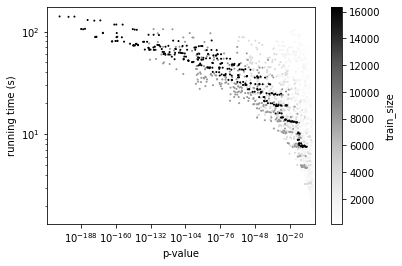

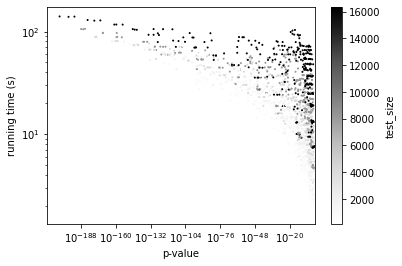

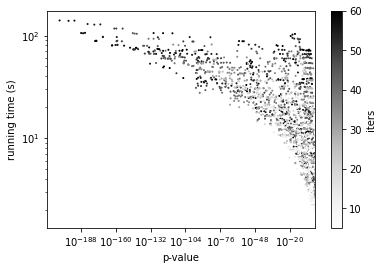

In [57]:
for c_col in ['train_size', 'test_size', 'iters']:
    scatterplot(c_col)

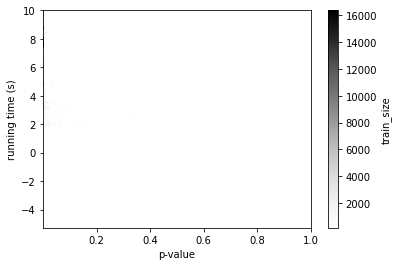

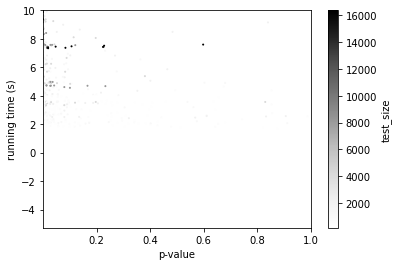

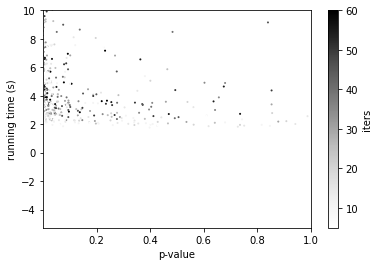

In [58]:
for c_col in ['train_size', 'test_size', 'iters']:
    scatterplot(c_col, 1e-5, 10, log_scale=False)